<a href="https://colab.research.google.com/github/mik-codic/Sentiment-Analysis-NLU/blob/main/NLU_To_do_Analysis_and_encoder_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

connecting to google drive


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


specifying directory


In [ ]:
%ls
%cd drive/MyDrive/NLU/models
%ls

drive/  sample_data/
/content/drive/MyDrive/NLU/models
 clean_classifier.pth
'embedd_dirty_data(movie_review).pkl'
 new_model_dirt_data_trained.pth
 new_model_subjectivity_data_trained_.pth


# **Defining the classification network**

In [ ]:
import nltk
import torch
import numpy
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt


class pol_database(Dataset):
    def __init__(self,embeddings,labels):
        self.embeddings = embeddings
        #self.stored_sentences = stored_sentences
        self.labels = labels
    def __len__(self):
        return len(self.embeddings)
    def __getitem__(self,id_elem):
        return (self.embeddings[id_elem],self.labels[id_elem])

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(768, 768*2)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(768*3, 384*2)
        self.fc3 = nn.Linear(384*2, 2)

        self.fc4 = nn.Linear(768*2,768*3)
        
        #self.fc4 = nn.Linear(100, 2)

    def forward(self, x):
    
       # x = torch.flatten(x, 1) # flatten all dimensions except batch
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = self.fc3(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        #x = self.dropout(x)
        x = self.fc3(x)
        #x = self.fc4(x)

        output = F.log_softmax(x,dim=1) 
        return output

class new_mod(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(384, 384*2)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(384*2, 384)
        self.fc3 = nn.Linear(384, 2)
        
        #self.fc4 = nn.Linear(100, 2)

    def forward(self, x):
    
       # x = torch.flatten(x, 1) # flatten all dimensions except batch
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = self.fc3(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        #x = self.fc4(x)

        output = F.log_softmax(x,dim=1) 
        return output

# **Retrieving the dataset**

In [ ]:
!pip install sentence-transformers
import nltk as nltk
import pickle
from tqdm import tqdm
from nltk.corpus import movie_reviews
from nltk.corpus import subjectivity
from sentence_transformers import SentenceTransformer

nltk.download('subjectivity')
nltk.download('movie_reviews')
nltk.download('punkt')
def lol2str(doc):
    # flatten & join
    return " ".join([w for sent in doc for w in sent])
def lol2str_(doc):
    # flatten & join
    return " ".join([w for w in doc])
def embedd_review(reviews,model):
    reviews_ebd = []
    for elem in tqdm(reviews):
        a = model.encode(elem,convert_to_numpy=False,convert_to_tensor=True)
        reviews_ebd.append(a)
    with open('embedd_dirty_data(movie_review).pkl', "wb") as fOut:
        pickle.dump({'embedded_review': reviews_ebd}, fOut, protocol=pickle.HIGHEST_PROTOCOL)
    return reviews_ebd
#def preprocess_data(data,PATH):
model = SentenceTransformer('all-mpnet-base-v2')

model_short = SentenceTransformer('all-MiniLM-L12-v2')

model.max_seq_length = 500
mr = movie_reviews
neg = mr.paras(categories='neg')
pos = mr.paras(categories='pos')

obj = subjectivity.sents(categories='obj') 
subj = subjectivity.sents(categories='subj')

corpus_polarity = [lol2str(d) for d in neg] + [lol2str(d) for d in pos]
corpus_subjectivity = [lol2str(d) for d in obj] + [lol2str(d) for d in subj]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 57.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=7444734c98b7f2af63d42953df7910058747648c5b4c9354697d3441e4427899
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


[nltk_data] Downloading package subjectivity to /root/nltk_data...
[nltk_data]   Unzipping corpora/subjectivity.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Create embedding using transformers library

In [ ]:
stored_embeddings = embedd_review(corpus_polarity,model)

100%|██████████| 2000/2000 [01:22<00:00, 24.38it/s]


In [ ]:

def statistics(corpus,dataframe):
    words_count = 0
    for i in corpus:
      for j in i:
        words_count += 1
    print("\nnumber of words in the corpus:",words_count)
  
statistics(corpus_polarity,mr)
used_words = [word for i in range(2000) for word in corpus_polarity[i]]
sentences = 
sent = movie_reviews.sents()
words = movie_reviews.words()
print(len(used_words))
  


number of words in the corpus: 7808520
7808520


# **Training Baseline Classifier**

here we train the baseline classifier on the non-processed data.

In [ ]:
net = Net()
labels_polarity = numpy.array([0] * 1000 + [1] * 1000) 
#labels = torch.tensor(labels)
#stored_embeddings = torch.tensor(stored_embeddings)
#print(stored_embeddings[0])
X_train, X_test, y_train, y_test = train_test_split(stored_embeddings, labels_polarity, test_size=0.33, random_state=42)
dataset = pol_database(X_train,y_train)
test_dataset = pol_database(X_test,y_test)
train_dataloader = DataLoader(dataset, shuffle=True, batch_size=5)
test_dataloader = DataLoader(test_dataset,shuffle=True, batch_size=5)

In [ ]:

#PATH_ = "/model_subjectivity_.pth"
#print("X_train lenght:{} \n y_train {} \n X_test:{},y_test:{} ".format(len(X_train),len(y_train),len(X_test),len(y_test)))
device = torch.device("cuda:0")
model.to(device)
#net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

# print(test_dataloader)
# print(train_dataloader)

# print("test_dataloader::",len(test_dataloader))
# print("train_dataloader",len(train_dataloader))

#print("Dataset: \n",train_dataloader.dataset)

def train_model(model_,n_epochs,criterion,train_datal,test_datal,PATH,optimizer_):
  loss_values = []

  for epoch in range(0,n_epochs):  # loop over the dataset multiple times
    j = 0
    model_.to(device)
    running_loss = 0.0
    #data_iter = iter(train_dataloader)
    #print(train_dataloader)
    
    for i, data in (train_datal):
        torch.Tensor(data)
        torch.Tensor(i)

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = i.to(device), data.to(device)
        # zero the parameter gradients
        #print(labels)
        optimizer_.zero_grad()

        #forward + backward + optimize
        outputs = model_(inputs)
        #inputs = torch.tensor(y_train)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer_.step()

        # print statistics
        #running_loss += loss.item()
        # if (j%5000) == 0:    # print every 2000 mini-batches
        #     print(f'[{epoch + 1}, {j + 1:5d}] loss: {loss}')
        loss_values.append(loss.item())
    j+=1
        
  plt.plot(loss_values)
  plt.show()
  torch.save(model_.state_dict(), PATH)
  return loss_values

# for epoch in range(0,70):  # loop over the dataset multiple times
#     j = 0
#     running_loss = 0.0
#     #data_iter = iter(train_dataloader)
#     #print(train_dataloader)
    
#     for i, data in (train_dataloader):
#         torch.Tensor(data)
#         torch.Tensor(i)

#         # get the inputs; data is a list of [inputs, labels]
#         inputs_, labels = i.to(device), data.to(device)
#         # zero the parameter gradients
#         optimizer.zero_grad()

#         #forward + backward + optimize
#         outputs = net(inputs_)
#         #inputs = torch.tensor(y_train)
#         loss = criterion(outputs,labels)
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
#         # if (j%5000) == 0:    # print every 2000 mini-batches
#         #     print(f'[{epoch + 1}, {j + 1:5d}] loss: {loss}')
      
#     j+=1
#     loss_values.append(running_loss)
# plt.plot(loss_values)
# plt.show()


#         #next(iter(train_dataloader))
#         # if i % 2000 == 1999:    # print every 2000 mini-batches
#         #     print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
#         #     running_loss = 0.0

# torch.save(net.state_dict(), PATH_MODEL)

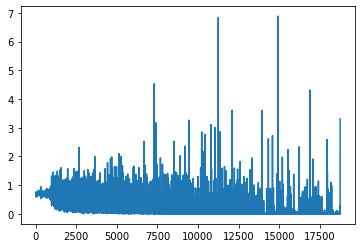

[0.6889828443527222,
 0.701471209526062,
 0.6994068026542664,
 0.6945362091064453,
 0.6924177408218384,
 0.6975005269050598,
 0.6939254999160767,
 0.6900517344474792,
 0.6773643493652344,
 0.7081667184829712,
 0.722136378288269,
 0.6970841288566589,
 0.700066089630127,
 0.7028536200523376,
 0.690527081489563,
 0.7132307291030884,
 0.690769612789154,
 0.6887572407722473,
 0.6751857995986938,
 0.7370127439498901,
 0.6796963810920715,
 0.6831942796707153,
 0.7095960974693298,
 0.6617341637611389,
 0.7488938570022583,
 0.7039921879768372,
 0.687203049659729,
 0.7015169858932495,
 0.689344584941864,
 0.6863753199577332,
 0.6850110292434692,
 0.6407657265663147,
 0.7688143849372864,
 0.6537278890609741,
 0.6357907652854919,
 0.7294530868530273,
 0.6783404350280762,
 0.5809122920036316,
 0.6029456257820129,
 0.673575758934021,
 0.7546296715736389,
 0.6741330623626709,
 0.6025805473327637,
 0.7529943585395813,
 0.6732472777366638,
 0.7454824447631836,
 0.7368146181106567,
 0.6754965782165527,


In [ ]:
train_model(net,70,criterion,train_dataloader,test_dataloader,"new_model_dirt_data_trained.pth",optimizer)


In [ ]:
def evalu(test_dataloader_,test_dataset,classifier):
  correct, total = 0, 0
  count_pos, count_neg = 0, 0
  with torch.no_grad():
    for i,data in test_dataloader_:
      torch.Tensor(data)
      torch.Tensor(i)
      
      inputs, labels = i.to(device),data.to(device)
      # calculate output by running through the network
      outputs = classifier(inputs)
      # get the predictions
      __, predicted = torch.max(outputs.data, 1)
      # print("\nOUTPUT : ",outputs)
      # print("\nAAAAAAAAAAAAAAA\n\n")
      # print("\n__ = ",__,"predicted = ",predicted )
      # print("\nlabel : ",labels)
      # update results
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      # print("\nwhat a fuck is this: ",(predicted == labels).sum().item())
      c = 0
      for i in labels:
        if i == 0 and i==predicted[c]:
          count_neg += 1
        if i == 1 and i==predicted[c]:
          count_pos += 1
        c+=1
    count_neg = (len(test_dataset)/2)-count_neg
    count_pos = (len(test_dataset)/2)-count_pos
    print("count_pos : ",count_pos, "count_neg : ",count_neg)
 
      
  print("correct: ",correct)
  print(f'Accuracy of the network on the {len(test_dataset)} test data: {100 * correct // total} %')
  print(f'negative mis')

evalu(test_dataloader,test_dataset,net)
# correct, total = 0, 0

# with torch.no_grad():
#   for i,data in test_dataloader:
#     torch.Tensor(data)
#     torch.Tensor(i)
    
#     inputs, labels = i.to(device),data.to(device)
#     # calculate output by running through the network
#     outputs = net(inputs)
#     # get the predictions
#     __, predicted = torch.max(outputs.data, 1)
#     # update results
#     total += labels.size(0)
#     correct += (predicted == labels).sum().item()
# print("correct: ",correct)
# print(f'Accuracy of the network on the {len(test_dataset)} test data: {100 * correct // total} %')


count_pos :  117.0 count_neg :  34.0
correct:  509
Accuracy of the network on the 660 test data: 77 %
negative mis


# **Training subjectivity classifier**
Now we learn the model for the subjectivity detection

In [ ]:

print(len(corpus_subjectivity))
labels_subjectivity = numpy.array([0] * 5000 + [1] * 5000) 

#corpus_subjectivity = [lol2str(d) for d in neg] + [lol2str(d) for d in pos]
stored_embedding = embedd_review(corpus_subjectivity,model)


10000


100%|██████████| 10000/10000 [02:22<00:00, 70.35it/s]


In [ ]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(stored_embedding, labels_subjectivity, test_size=0.2, random_state=42)
dataset_sub = pol_database(X_train_sub,y_train_sub)
test_dataset_sub = pol_database(X_test_sub,y_test_sub)
train_dataloader_sub = DataLoader(dataset_sub, shuffle=True, batch_size=5)
test_dataloader_sub = DataLoader(test_dataset_sub,shuffle=True, batch_size=5)
#print(X_test[10])


#train_dataloader_procesd = preprocess_data(corpus_polarity)
model_subjectivity = Net()
print(len(stored_embedding))

10000


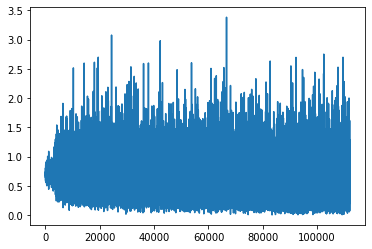

[0.6921087503433228,
 0.6994589567184448,
 0.6944912075996399,
 0.6996944546699524,
 0.6940911412239075,
 0.7070093154907227,
 0.6834011077880859,
 0.7122365832328796,
 0.6848263740539551,
 0.6825093030929565,
 0.7132444381713867,
 0.6875574588775635,
 0.7082337141036987,
 0.7102950811386108,
 0.7048881649971008,
 0.7038714289665222,
 0.6829690933227539,
 0.6801782846450806,
 0.640400230884552,
 0.7379897236824036,
 0.7215545177459717,
 0.7104743719100952,
 0.6858132481575012,
 0.7068549394607544,
 0.6973497867584229,
 0.6917628049850464,
 0.6864935755729675,
 0.6836382746696472,
 0.6527529358863831,
 0.731810986995697,
 0.6388689279556274,
 0.6062754392623901,
 0.7621704936027527,
 0.8050670623779297,
 0.6571081280708313,
 0.6759803891181946,
 0.6761767268180847,
 0.7368572354316711,
 0.6762361526489258,
 0.7699345946311951,
 0.69670170545578,
 0.6922034621238708,
 0.6815522909164429,
 0.6787059903144836,
 0.7659505605697632,
 0.7053825259208679,
 0.6605230569839478,
 0.72613716125488

In [ ]:
criterion_sub = nn.CrossEntropyLoss()
optimizer_sub = torch.optim.SGD(model_subjectivity.parameters(), lr=0.2)
train_model(model_subjectivity,70,criterion_sub,train_dataloader_sub,test_dataloader_sub,"new_model_subjectivity_data_trained_.pth",optimizer_sub)


In [ ]:
evalu(test_dataloader_sub,test_dataset_sub,model_subjectivity)

count_pos :  143.0 count_neg :  450.0
correct:  1407
Accuracy of the network on the 2000 test data: 70 %
negative mis


# **Second Classification Phase**

In [ ]:
def preprocess_data(corpus,model_encoding,classifier):
    model_encoding.to(device)
    classifier.to(device)
    #corpus = [lol2str(d) for d in neg] + [lol2str(d) for d in pos]
    # embeddings_corpus = model.encode(corpus,convert_to_numpy=False,convert_to_tensor=True)

    # #Store sentences & embeddings on disc
    # with open('embeddings_polarity_long_ALL.pkl', "wb") as fOut:
    #     pickle.dump({'sentences': corpus, 'embeddings_corpus': embeddings_corpus}, fOut, protocol=pickle.HIGHEST_PROTOCOL)

    # #Load sentences & embeddings from disc
    # with open('embeddings_polarity_long_ALL.pkl', "rb") as fIn:
    #     stored_data = pickle.load(fIn)
    #     stored_sentences = stored_data['sentences']
    #     stored_embeddings = stored_data['embeddings_corpus']
    clean_data = []

    for review in tqdm(corpus):
        sentences = nltk.sent_tokenize(review)
        subjective_sentences = ""
        for sent in sentences:
            #print(sent)
            sent_enc = model_encoding.encode([sent],convert_to_numpy=False,convert_to_tensor=True)
            output = classifier(sent_enc)
            __, predict = torch.max(output.data,1)
            if(predict == 0):
                subjective_sentences = subjective_sentences+sent
            #subjective_sentences = subjective_sentences+sent
        clean_data.append(subjective_sentences)
        #print("clean data \n",clean_data[0])
    # with open('clean_DATA_prova.pkl', "wb") as fOut:
    #     pickle.dump({'review': clean_data}, fOut, protocol=pickle.HIGHEST_PROTOCOL)
    return clean_data

In [ ]:
clean_data = preprocess_data(corpus_polarity,model,model_subjectivity)

100%|██████████| 2000/2000 [14:23<00:00,  2.32it/s]


In [ ]:
clean_data_emb = embedd_review(clean_data,model)

In [ ]:
print(len(clean_data_emb))

In [ ]:
clean_classifier = Net()
criterion_ = nn.CrossEntropyLoss()
for i in clean_data_emb:
  torch.Tensor(i)
optimizer_clean = torch.optim.SGD(clean_classifier.parameters(),lr=0.1)
labels_polarity_clean = numpy.array([0] * 1000 + [1] * 1000) 
#labels = torch.tensor(labels)
#stored_embeddings = torch.tensor(stored_embeddings)
#print(stored_embeddings[0])
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(clean_data_emb, labels_polarity_clean, test_size=0.33, random_state=42)
dataset_clean = pol_database(X_train_clean,y_train_clean)
test_dataset_clean = pol_database(X_test_clean,y_test_clean)
train_dataloader_clean = DataLoader(dataset_clean, shuffle=True, batch_size=5)
test_dataloader_clean = DataLoader(test_dataset_clean,shuffle=True, batch_size=5)

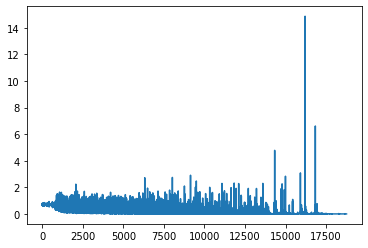

[0.6895694732666016,
 0.6669533848762512,
 0.7132296562194824,
 0.6564239859580994,
 0.7980258464813232,
 0.7085093855857849,
 0.6955698132514954,
 0.693428635597229,
 0.6954300403594971,
 0.6933876276016235,
 0.685088038444519,
 0.6839183568954468,
 0.7072592973709106,
 0.6842554211616516,
 0.7040539383888245,
 0.686148464679718,
 0.6662663221359253,
 0.6471057534217834,
 0.6756964921951294,
 0.6265984773635864,
 0.7974897623062134,
 0.5947308540344238,
 0.8051319122314453,
 0.7216618657112122,
 0.7143893241882324,
 0.6823209524154663,
 0.646569013595581,
 0.7230356931686401,
 0.7159958481788635,
 0.7103061676025391,
 0.7073677778244019,
 0.7010191082954407,
 0.6868859529495239,
 0.7009302973747253,
 0.6786635518074036,
 0.7067582607269287,
 0.7018707394599915,
 0.6779664158821106,
 0.6822693943977356,
 0.6222273707389832,
 0.7276633977890015,
 0.6310445666313171,
 0.6757528185844421,
 0.6155926585197449,
 0.6727286577224731,
 0.7446428537368774,
 0.6742337346076965,
 0.80037391185760

In [ ]:
torch.set_grad_enabled(True)
train_model(clean_classifier,70,criterion_,train_dataloader_clean,test_dataloader_clean,"clean_classifier.pth",optimizer_clean)

In [ ]:
evalu(test_dataloader_clean,test_dataset_clean,clean_classifier)

In [ ]:
#!pip install sentence-transformers
from mimetypes import init
import numpy as np
import torch
import nltk
from tqdm import tqdm
import pickle
from sklearn.model_selection import train_test_split
import sys
from sentence_transformers import SentenceTransformer
PATH = './mymodel_subj.pth'

model = SentenceTransformer('all-mpnet-base-v2')

model.max_seq_length = 500
clf = Net()
#clf.load_state_dict(torch.load(PATH))


#Our sentences we like to encode
# sentences = ['This framework generates embeddings for each input sentence',
#     'Sentences are passed as a list of string.',
#     'The quick brown fox jumps over the lazy dog.']

# #Sentences are encoded by calling model.encode()
# embeddings = model.encode(sentences)

#Print the embeddings
# for sentence, embedding in zip(sentences, embeddings):
#     print("Sentence:", sentence)
#     print("Embedding:", embedding)
#     print("")

# movie reviews data (negative, positive)
mr = movie_reviews
neg = mr.paras(categories='neg')
pos = mr.paras(categories='pos')


def lol2str(doc):
    # flatten & join
    return " ".join([w for sent in doc for w in sent])
def lol2str_(doc):
    # flatten & join
    return " ".join([w for w in doc])


#print(neg[1])
corpus = [lol2str(d) for d in neg] + [lol2str(d) for d in pos]
def preprocess_data(corpus):
    #corpus = [lol2str(d) for d in neg] + [lol2str(d) for d in pos]
    # embeddings_corpus = model.encode(corpus,convert_to_numpy=False,convert_to_tensor=True)

    # #Store sentences & embeddings on disc
    # with open('embeddings_polarity_long_ALL.pkl', "wb") as fOut:
    #     pickle.dump({'sentences': corpus, 'embeddings_corpus': embeddings_corpus}, fOut, protocol=pickle.HIGHEST_PROTOCOL)

    # #Load sentences & embeddings from disc
    # with open('embeddings_polarity_long_ALL.pkl', "rb") as fIn:
    #     stored_data = pickle.load(fIn)
    #     stored_sentences = stored_data['sentences']
    #     stored_embeddings = stored_data['embeddings_corpus']
    clean_data = []

    for review in tqdm(corpus):
        sentences = nltk.sent_tokenize(review)
        subjective_sentences = ""
        for sent in sentences:
            #print(sent)
            sent_enc = model.encode([sent],convert_to_numpy=False,convert_to_tensor=True)
            output = clf(sent_enc)
            __, predict = torch.max(output.data,1)
            if(predict == 0):
                subjective_sentences = subjective_sentences+sent
            #subjective_sentences = subjective_sentences+sent
        clean_data.append(subjective_sentences)
        #print("clean data \n",clean_data[0])
    with open('clean_DATA_prova.pkl', "wb") as fOut:
        pickle.dump({'review': clean_data}, fOut, protocol=pickle.HIGHEST_PROTOCOL)
